### Convolutional Neural Network (CNN) in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

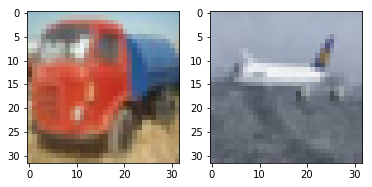

In [7]:
plt.subplot(121)
plt.imshow(X_train[102])

plt.subplot(122)
plt.imshow(X_train[199])

### Preprocessing of the data

In [8]:
# Normalize 

X_train = X_train/255
X_test = X_test/255

In [18]:
# One hot encoding of target values

from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

### Building the model

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input

row = 32
col = 32
n_chnl = 3

my_cnn = Sequential()

# Conv2D (no_of_filters, (filter row, filter column), stride = 1, activation = 'relu')
my_cnn.add(Conv2D(8, (5,5), activation = 'relu', padding='same',
                  input_shape = (row,col,n_chnl)))

# MaxPool2D (pool_size = (2,2))
my_cnn.add(MaxPool2D((2,2)))

my_cnn.add(Conv2D(16, (3,3), activation = 'relu', padding='same'))
my_cnn.add(MaxPool2D((2,2)))

my_cnn.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
my_cnn.add(MaxPool2D((2,2)))

my_cnn.add(Flatten())
my_cnn.add(Dense(256,activation = 'relu'))
my_cnn.add(Dense(10, activation='softmax'))

In [20]:
my_cnn.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics = ['accuracy'])

In [21]:
my_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         608       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
__________

### Train the model

In [22]:
batch_size = 128
n_epochs = 10

history = my_cnn.fit(X_train, y_train_one_hot, batch_size=batch_size,
                     epochs=n_epochs, shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 16s 310us/step - loss: 1.6694 - acc: 0.3940
Epoch 2/10
50000/50000 [==============================] - 15s 298us/step - loss: 1.3712 - acc: 0.5069
Epoch 3/10
50000/50000 [==============================] - 15s 300us/step - loss: 1.2278 - acc: 0.5659
Epoch 4/10
50000/50000 [==============================] - 15s 302us/step - loss: 1.1396 - acc: 0.5976
Epoch 5/10
50000/50000 [==============================] - 15s 301us/step - loss: 1.0637 - acc: 0.6258
Epoch 6/10
50000/50000 [==============================] - 15s 305us/step - loss: 1.0147 - acc: 0.6435
Epoch 7/10
50000/50000 [==============================] - 15s 305us/step - loss: 0.9659 - acc: 0.6623
Epoch 8/10
50000/50000 [==============================] - 15s 304us/step - loss: 0.9165 - acc: 0.6799
Epoch 9/10
50000/50000 [==============================] - 15s 301us/step - loss: 0.8718 - acc: 0.6947
Epoch 10/10
50000/50000 [==============================] - 15s 308us/step - loss: 

### Making Predictions

In [23]:
y_pred = my_cnn.predict_classes(X_test)

y_pred.shape

(10000,)

### Measuring the performance of the Model

In [24]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

In [25]:
conf_mat

array([[727,  38,  54,  24,  10,   7,  28,   7,  70,  35],
       [ 22, 878,   5,   9,   4,   9,  10,   6,  21,  36],
       [ 80,  16, 502,  99,  69,  69, 116,  23,  14,  12],
       [ 18,  28,  58, 475,  80, 138, 141,  32,  10,  20],
       [ 26,  10,  91,  64, 573,  25, 137,  59,  12,   3],
       [ 10,  13,  52, 192,  57, 533,  86,  45,   6,   6],
       [  4,  13,  33,  44,  27,  11, 851,   8,   7,   2],
       [ 23,   9,  22,  64,  79,  75,  26, 677,   4,  21],
       [ 72,  72,  14,  20,   6,   5,  14,   4, 776,  17],
       [ 52, 226,   6,  24,   4,   9,  25,  14,  38, 602]], dtype=int64)

In [26]:
accuracy = np.trace(conf_mat)/np.sum(conf_mat)

print("Accuracy of the model: {}%".format(100*accuracy))

Accuracy of the model: 65.94%


### Plotting Loss vs Epochs curve

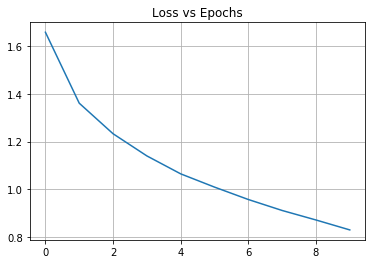

In [17]:
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.grid()
plt.show()

### Plotting Accuracy vs Epochs curve

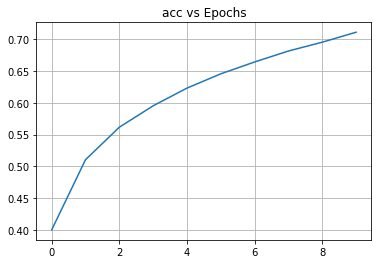

In [18]:
plt.plot(history.history['acc'])
plt.title("acc vs Epochs")
plt.grid()
plt.show()